# **Visualization**

## **Installing and importing dependencies and dataframes**

In [ ]:
!pip install soccerplots &> /dev/null
!pip install dill &> /dev/null

In [ ]:
import dill
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DC_Inter/'
with open(path+'not_sorted_defenders.pkl','rb') as f:
    players_stats = dill.load(f)

In [ ]:
players_stats.head()

,index,League,Season,Team,Player,Nation,Position,Age,Born,distance from acerbi,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
0,3,ARG-Primera División Argentina,2223,Aldosivi,Mario López Quintana,PAR,DF,26,1995,1.309728,...,0.086957,0.0,0.608696,0.086957,1.652174,0.0,0.086957,5.304348,3.913043,66.7
1,4,ARG-Primera División Argentina,2223,Aldosivi,Nicolás Valentini,ARG,DF,20,2001,1.193224,...,0.370709,0.0,0.700229,0.08238,0.864989,0.08238,0.0,4.819222,5.684211,68.8
2,5,ARG-Primera División Argentina,2223,Aldosivi,Patricio Boolsen,ARG,DF,24,1998,1.018365,...,0.298013,0.0,0.745033,0.298013,1.192053,0.074503,0.0,5.587748,5.811258,60.3
3,7,ARG-Primera División Argentina,2223,Aldosivi,Santiago Laquidaín,ARG,DF,20,2001,0.982226,...,0.557851,0.0,0.929752,0.557851,1.208678,0.0,0.0,5.671488,3.997934,58.1
4,12,ARG-Primera División Argentina,2223,Argentinos Jun,Leonel González,ARG,DF,27,1994,1.117630,...,0.505618,0.0,1.13764,0.379213,0.505618,0.0,0.0,7.078652,1.643258,46.2


## **Radar Charts of the 5 players most similar to Francesco Acerbi**

Let us now construct radar charts comparing Francesco Acerbi with the 5 players most similar to him found by our algorithm. The player comparisons will be made on a subset of the statistics considered to compute the distance.

For the purpose of visualization, we will use the library *soccerplots* of which the complete documentation can be found at the following link: [soccerplots](https://github.com/Slothfulwave612/soccerplots).

### **Defining auxiliary functions**

In [ ]:
list(players_stats.columns)

['index',
 'League',
 'Season',
 'Team',
 'Player',
 'Nation',
 'Position',
 'Age',
 'Born',
 'distance from acerbi',
 'yellow_cards_per90',
 'red_cards_per90',
 'progressive_carries_per90',
 'progressive_passes_per90',
 'passes_attempted_per90',
 'short_passes_attempted_per90',
 'Short passes completed%',
 'medium_passes_attempted_per90',
 'Medium passes completed%',
 'long_passes_attempted_per90',
 'Long passes completed%',
 'total_passing_distance_per90',
 'progressive_passing_distance_per90',
 'key_passes_per90',
 'passes_into_final_third_per90',
 'passes_into_penalty_area_per90',
 'passes_offside_per90',
 'passes_blocked_per90',
 'tackles_per90',
 'tackles_won_per90',
 'tackles_defensive_third_per90',
 'tackles_middle_third_per90',
 'tackles_offensive_third_per90',
 'dribblers_challenged_per90',
 '% of dribblers tackled',
 'challenges_lost_per90',
 'blocks_per90',
 'shots_blocked_per90',
 'interceptions_per90',
 'tackles_interceptions_per90',
 'clearances_per90',
 'errors_per90',


We select a subset of the most significative stats for a defender.

In [ ]:
significative_stats = players_stats[['index', 'Player', 'distance from acerbi', 'progressive_passes_per90', 'tackles_per90',
 'tackles_won_per90', 'blocks_per90', 'shots_blocked_per90', 'interceptions_per90', 'tackles_interceptions_per90', 'clearances_per90', 'ball_recoveries_per90', 'aerial_duels_per90',
'fouls_committed_per90']]

In [ ]:
significative_stats.sort_values('distance from acerbi')[1:6]

,index,Player,distance from acerbi,progressive_passes_per90,tackles_per90,tackles_won_per90,blocks_per90,shots_blocked_per90,interceptions_per90,tackles_interceptions_per90,clearances_per90,ball_recoveries_per90,aerial_duels_per90,fouls_committed_per90
1088,2166,Jarrad Branthwaite,0.504807,3.614458,1.039157,0.63253,0.768072,0.542169,1.626506,2.665663,4.337349,6.641566,4.924699,0.542169
220,425,Gabriel Dos Santos,0.538934,4.039308,1.267234,0.792021,1.293634,0.686418,0.844823,2.112056,3.300088,5.042534,4.646524,0.660018
818,1646,Federico Gatti,0.540120,3.480663,0.93232,0.683702,1.243094,0.870166,1.305249,2.237569,3.356354,6.029006,3.604972,0.994475
729,1480,Matthias Ginter,0.547508,3.588235,1.264706,0.588235,1.176471,0.705882,1.029412,2.294118,4.5,5.411765,5.529412,0.676471
1079,2154,Paweł Bochniewicz,0.551666,3.277224,1.453109,0.865682,1.360357,0.896599,1.545861,2.998969,5.255926,5.410512,5.070423,0.803847


Obviously, we exclude the columns *index*, *Player* and *distance from acerbi* from the list of significative stats.

In [ ]:
params = list(significative_stats.columns)[3:]

We define a function that creates ranges for radar charts.

In [ ]:
def make_ranges(player1, player2, params=params):
  ranges = []
  for x in params:
    a = min(significative_stats[(significative_stats['Player']== player1) | (significative_stats['Player']== player2)][params][x]) # Find the minimum for a stat
    a = a - (a*.25) # Extending the minimum

    b = max(significative_stats[(significative_stats['Player']== player1) | (significative_stats['Player']== player2)][params][x]) # Find the maximum for a stat
    b = b + (b*.25) # Extending the maximum

    ranges.append((a,b))
  return ranges

Now, we define the function that allow us to create the radar charts, based on the previous function that creates ranges.

In [ ]:
def make_radar(player1, player2, params = params):
  player1_values = significative_stats[(significative_stats['Player']== player1)][params].values.tolist()[0]
  player2_values = significative_stats[(significative_stats['Player']== player2)][params].values.tolist()[0]
  values = [player1_values, player2_values]
  title = dict(
    title_name=player1,
    title_color='red',
    subtitle_name=players_stats[players_stats['Player'] == player1]['Team'].values[0],
    subtitle_color='red',
    title_name_2=player2,
    title_color_2='blue',
    subtitle_name_2=players_stats[players_stats['Player'] == player2]['Team'].values[0],
    subtitle_color_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15,
)
  endnote = f"Similarity score: {round(players_stats[players_stats['Player'] == player2]['distance from acerbi'].values[0],3)}\nVisualization made by Cristian Ceccarelli\nAll the stats are per90 and refer to the 2022/2023 season\nThe lower the similarity score, the more similar the players are\nNOTE: The statistics in the graph are NOT the only ones on which the similarity score was calculated."
  radar = Radar()
  return radar.plot_radar(ranges = make_ranges(player1, player2),
                          params =['Progressive passes', 'Tackles', 'Tackles won', 'Blocks', 'Shots blocked', 'Interceptions','Tackles and interceptions',
                          'Clearances', 'Ball recoveries', 'Aerial duels', 'Fouls committed'],
                          values = values,
                          title = title,
                          endnote=endnote,
                          radar_color = ['red', 'blue'],
                          compare = True)

### **Visualizing the radar charts**

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

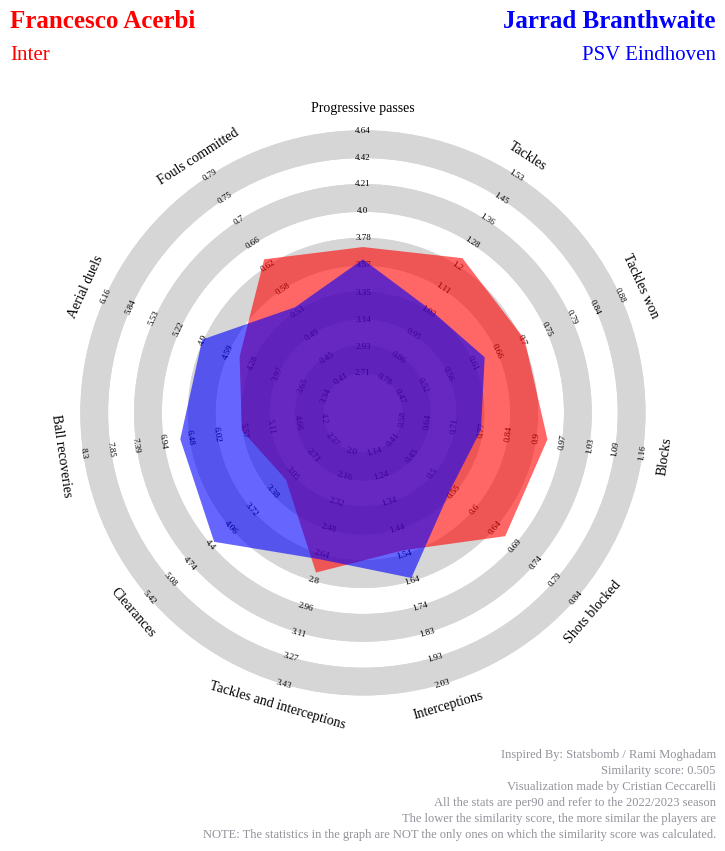

In [ ]:
make_radar('Francesco Acerbi', 'Jarrad Branthwaite')

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

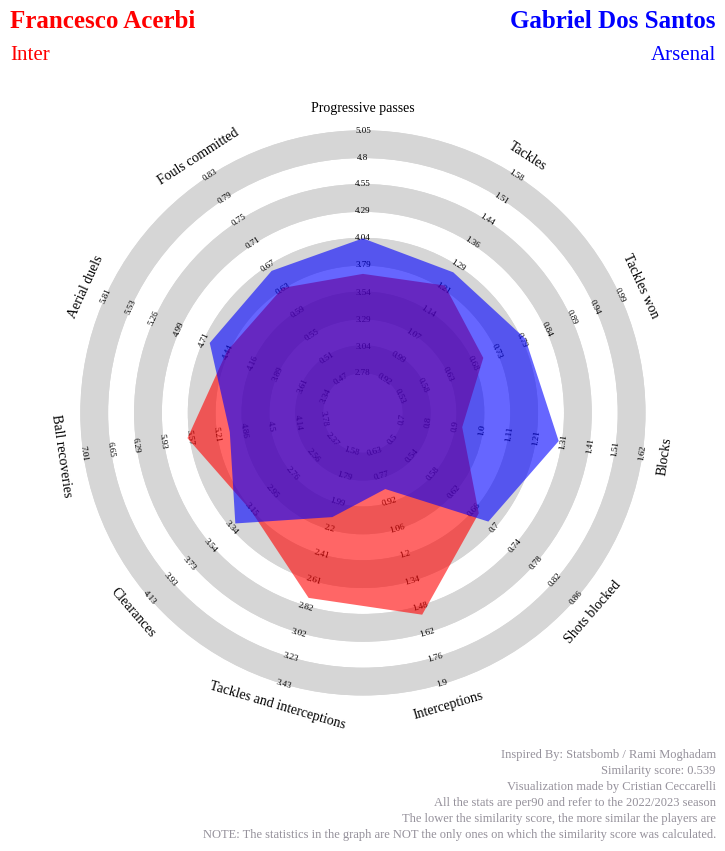

In [ ]:
make_radar('Francesco Acerbi', 'Gabriel Dos Santos')

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

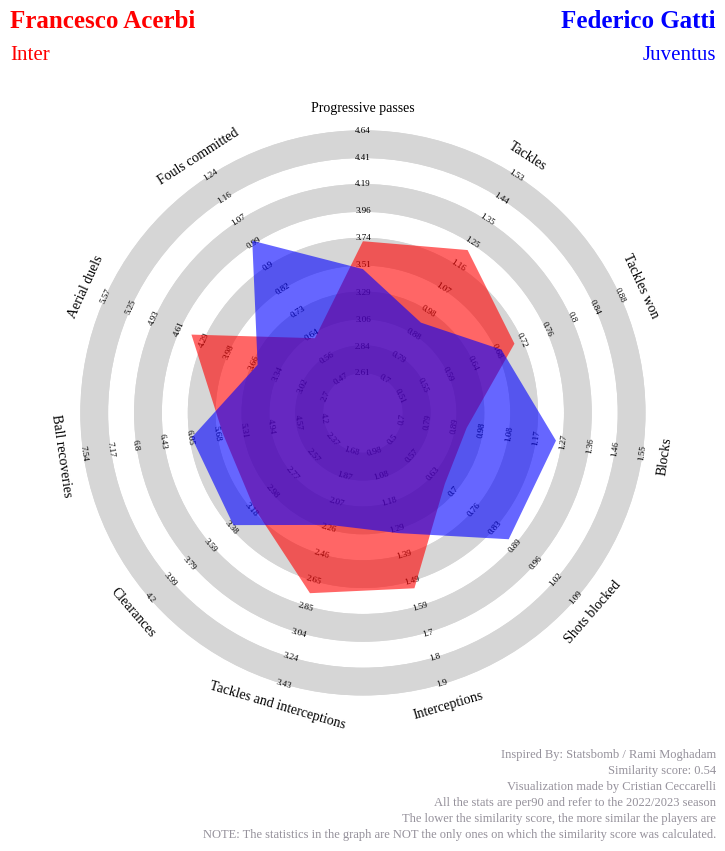

In [ ]:
make_radar('Francesco Acerbi', 'Federico Gatti')

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

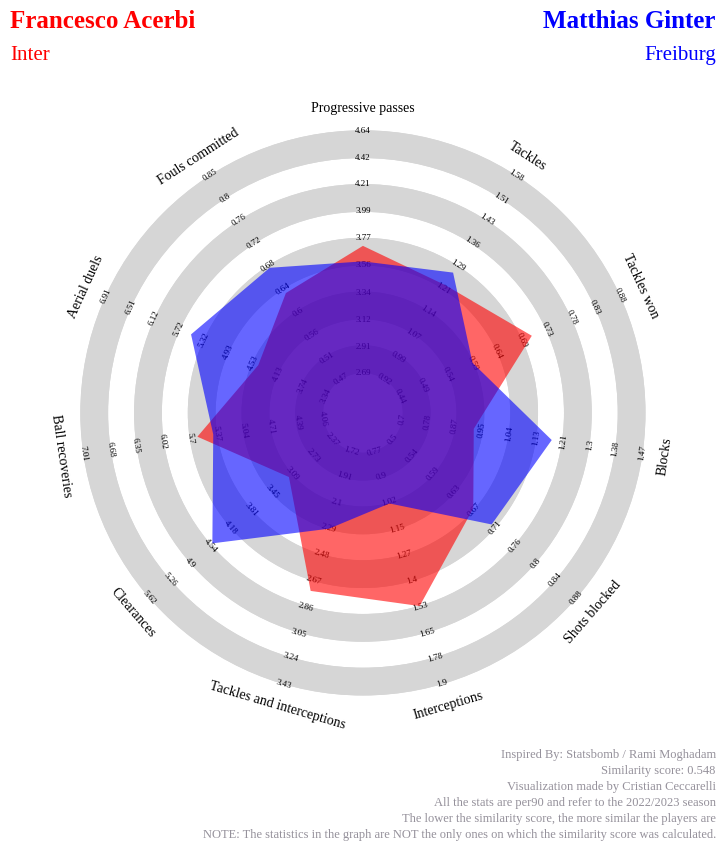

In [ ]:
make_radar('Francesco Acerbi', 'Matthias Ginter')

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

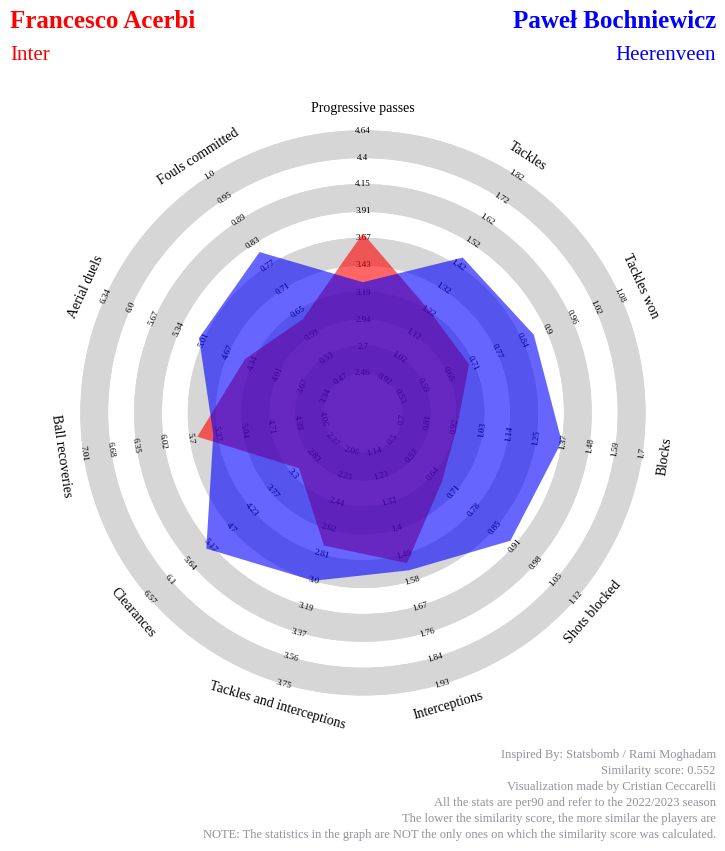

In [ ]:
make_radar('Francesco Acerbi', 'Paweł Bochniewicz')